In [15]:
import re
import sys
import csv
import tweepy 
from tweepy import OAuthHandler
import matplotlib.pyplot as plt 
from collections import Counter
from aylienapiclient import textapi
class TwitterClient(object): 
    ''' 
    Generic Twitter Class for getting tweets data from twitter and cleaning it . 
    '''
    def __init__(self): 
        ##Class constructor for authentication purpose. 
        
        # keys and tokens from the Twitter Dev 
        consumer_key = "eSOj4jKT2sYIYsIg8ln4EpzaU"
        consumer_secret = "snpr1dYylWW87YX5F8kAd2U9jDCqs0Da0m2vZV2XcRXnF16VO1"
        access_token = "1307326044-hTKCxpOujjjVmEcqBPxACL6WXDNJcsjDcE1ENmE"
        access_token_secret = "9Cr3DFHvrNfXhpY6IaC22oOUkJaDZGhIBbNyR6KWgLOK3"
  
        # attempt authentication 
        try: 
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
            self.auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            self.api = tweepy.API(self.auth) 
        except: 
            print("Error: Twitter Authentication Failed") 
  
    def clean_tweet(self, tweet): 
        # function to clean tweet text by removing emojis, special characters, links 
        return  ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 
                               
    def get_tweets(self, query, count = 20): 
        #function to fetch all tweets.
        # defauly count for fetching tweets is 20
        try: 
            # call twitter api to fetch tweets 
            fetched_tweets = self.api.search(q = query, count = count)  
            return fetched_tweets 
            
        except tweepy.TweepError as e: 
            print("Error while fetching tweets : " + str(e))
                               
class AYLIENClient(object): 
    ''' 
    Generic AYLIEN Class for getting sentiment of of given text . 
    '''
    def __init__(self): 
        ''' 
        Class constructor for authentication of Text api for AYLIEN  . 
        '''

        ## AYLIEN credentials
        application_id = "05b1f9cb"
        application_key = "3e052d190a53c789d64fd6a9276d54ad"

  
        # attempt authentication 
        try: 
            self.api = textapi.Client(application_id, application_key)

        except: 
            print("Error: AYLIEN Authentication Failed")  
  
    def get_tweet_sentiment(self, tweet): 
        # function to classify sentiment of passed tweet 
        response = self.api.Sentiment({'text': tweet})
        return response


What subject do you want to analyze for this example? 
Modi
How many Tweets do you want to analyze? 
20
Analyzed 20 Tweets about Modi 

Saved data in Sentiment_Analysis_of_20_Tweets_About_Modi.csv 

Positive tweets percentage: 10.0 %
Negative tweets percentage: 35.0 %
Neutral tweets percentage: 55.0 %


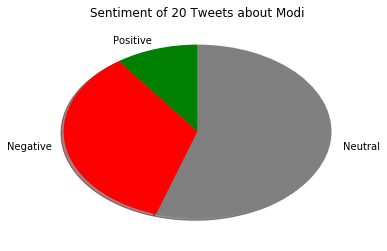

In [16]:
query = input("What subject do you want to analyze for this example? \n")
number = input("How many Tweets do you want to analyze? \n")
file_name = 'Sentiment_Analysis_of_{}_Tweets_About_{}.csv'.format(number, query)

api = TwitterClient() 

tweets = api.get_tweets(query = query, count = number) 
text_api=AYLIENClient() 
with open(file_name, 'w', newline='') as csvfile:
    csv_writer = csv.DictWriter(
    f=csvfile,
    fieldnames=["Tweet", "Sentiment"]
    )
    csv_writer.writeheader()

    for c, result in enumerate(tweets, start=1):
        tweet = result.text
        cleaned_tweet = api.clean_tweet(tweet)
        if len(tweet) == 0:
           print('Empty Tweet')
           continue
        response = text_api.get_tweet_sentiment( cleaned_tweet)
        csv_writer.writerow({
        'Tweet': response['text'],
        'Sentiment': response['polarity']
        })

print("Analyzed {} Tweets about {} \n".format(number, query))

print("Saved data in Sentiment_Analysis_of_{}_Tweets_About_{}.csv \n".format(number, query))

with open(file_name, 'r') as data:
    counter = Counter()
    for row in csv.DictReader(data):
        counter[row['Sentiment']] += 1

    positive = counter['positive']
    negative = counter['negative']
    neutral = counter['neutral']

# percentage of positive tweets 
print("Positive tweets percentage: {} %".format(100*positive/len(tweets))) 
# percentage of negative tweets 
print("Negative tweets percentage: {} %".format(100*negative/len(tweets))) 
# percentage of neutral tweets 
print("Neutral tweets percentage: {} %".format(100*neutral/len(tweets))) 

## declare the variables for the pie chart, using the Counter variables for "sizes"
colors = ['green', 'red', 'grey']
sizes = [positive, negative, neutral]
labels = 'Positive', 'Negative', 'Neutral'
 
## use matplotlib to plot the chart
plt.pie(
   x=sizes,
   shadow=True,
   colors=colors,
   labels=labels,
   startangle=90
)
 
plt.title("Sentiment of {} Tweets about {}".format(number, query))
plt.show()
